Titanic Ship Case Study Problem Description: 
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.  One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills. Perform Below Tasks to complete the assignment:-

Download the dataset: Dataset
Load the dataset.
Perform Below Visualizations. ● Univariate Analysis ● Bi - Variate Analysis ● Multi - Variate Analysis
Perform descriptive statistics on the dataset.
Handle the Missing values.
Find the outliers and replace the outliers
Check for Categorical columns and perform encoding.
Split the data into dependent and independent variables.
Scale the independent variables
Split the data into training and testing

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')


In [13]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


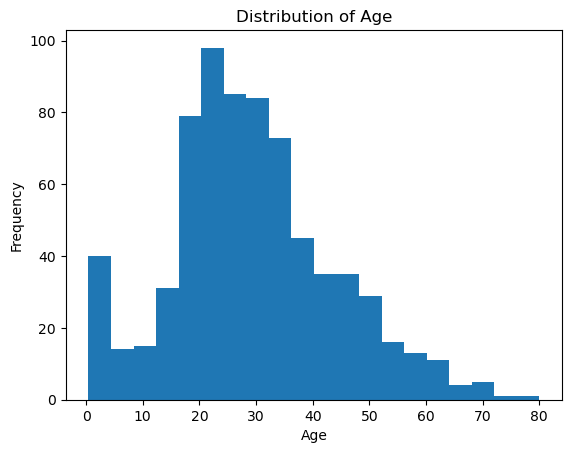

In [14]:
import matplotlib.pyplot as plt

# Example: Histogram of Age
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


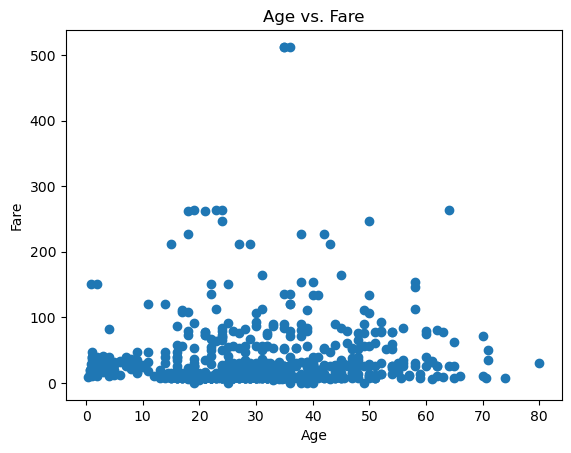

In [15]:
# Example: Scatter plot of Age vs. Fare
plt.scatter(df['age'], df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()


C:\Users\Akshu\AppData\Local\Temp\ipykernel_23092\3348407547.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


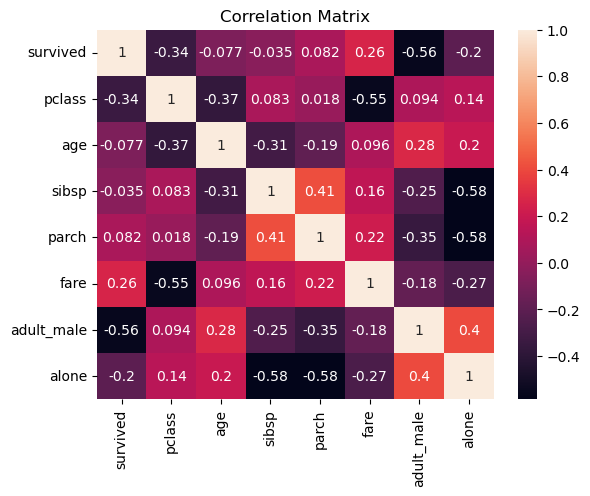

In [16]:
import seaborn as sns

# Example: Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Example: Descriptive statistics
print(df.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [18]:
# Example: Handling missing values by dropping rows with missing values
df = df.dropna()

# Example: Handling missing values by filling with mean
df['age'] = df['age'].fillna(df['age'].mean())


C:\Users\Akshu\AppData\Local\Temp\ipykernel_23092\839084387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].fillna(df['age'].mean())


In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


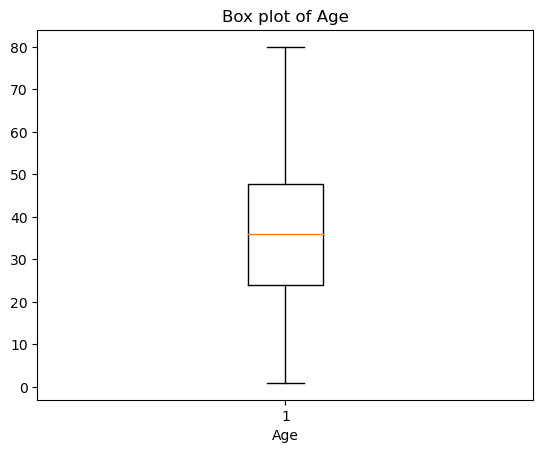

C:\Users\Akshu\AppData\Local\Temp\ipykernel_23092\1828662503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = np.where(df['age'] > 70, median_age, df['age'])


In [20]:
import numpy as np
# Example: Box plot to identify outliers
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.title('Box plot of Age')
plt.show()

# Example: Replacing outliers with the median
median_age = df['age'].median()
df['age'] = np.where(df['age'] > 70, median_age, df['age'])


In [24]:
# Example: One-hot encoding for 'Sex' column
df = pd.get_dummies(df, columns=['sex'])


In [25]:
df

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
6,0,1,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0,1
10,1,3,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,1,0
11,1,1,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,1,0
872,0,1,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,0,1
879,1,1,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,1,0
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0


In [26]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encoding for 'Embarked' column
le = LabelEncoder()
df['embarked'] = le.fit_transform(df['embarked'])

In [42]:
df['class'] = le.fit_transform(df['class'])

In [43]:
df['who'] = le.fit_transform(df['who'])

In [49]:
df['deck'] = le.fit_transform(df['deck'])

In [55]:
df['embark_town'] = le.fit_transform(df['embark_town'])

In [61]:
df['alive'] = le.fit_transform(df['alive'])

In [62]:
df

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
1,1,1,38.0,1,0,71.2833,0,0,2,False,2,0,1,False,1,0
3,1,1,35.0,1,0,53.1000,2,0,2,False,2,2,1,False,1,0
6,0,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True,0,1
10,1,3,4.0,1,1,16.7000,2,2,0,False,6,2,1,False,1,0
11,1,1,58.0,0,0,26.5500,2,0,2,False,2,2,1,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,2,0,2,False,3,2,1,False,1,0
872,0,1,33.0,0,0,5.0000,2,0,1,True,1,2,0,True,0,1
879,1,1,56.0,0,1,83.1583,0,0,2,False,2,0,1,False,1,0
887,1,1,19.0,0,0,30.0000,2,0,2,False,1,2,1,True,1,0


In [63]:
# Example: Splitting into dependent and independent variables
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent variable


In [64]:
X

,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
1,1,38.0,1,0,71.2833,0,0,2,False,2,0,1,False,1,0
3,1,35.0,1,0,53.1000,2,0,2,False,2,2,1,False,1,0
6,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True,0,1
10,3,4.0,1,1,16.7000,2,2,0,False,6,2,1,False,1,0
11,1,58.0,0,0,26.5500,2,0,2,False,2,2,1,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,2,0,2,False,3,2,1,False,1,0
872,1,33.0,0,0,5.0000,2,0,1,True,1,2,0,True,0,1
879,1,56.0,0,1,83.1583,0,0,2,False,2,0,1,False,1,0
887,1,19.0,0,0,30.0000,2,0,2,False,1,2,1,True,1,0


In [65]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler

# Example: Standardization of independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.37341964,  0.18682551,  0.82857574, ..., -0.8660254 ,
         1.03352882, -1.03352882],
       [-0.37341964, -0.01256995,  0.82857574, ..., -0.8660254 ,
         1.03352882, -1.03352882],
       [-0.37341964,  1.25026795, -0.72607153, ...,  1.15470054,
        -0.96755889,  0.96755889],
       ...,
       [-0.37341964,  1.38319826, -0.72607153, ..., -0.8660254 ,
         1.03352882, -1.03352882],
       [-0.37341964, -1.07601239, -0.72607153, ...,  1.15470054,
         1.03352882, -1.03352882],
       [-0.37341964, -0.61075632, -0.72607153, ...,  1.15470054,
        -0.96755889,  0.96755889]])

In [67]:
from sklearn.model_selection import train_test_split

# Example: Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [68]:
X_train

array([[-0.37341964,  0.68531416, -0.72607153, ...,  1.15470054,
        -0.96755889,  0.96755889],
       [-0.37341964, -0.41136086,  0.82857574, ..., -0.8660254 ,
        -0.96755889,  0.96755889],
       [ 1.56836251, -2.13945484,  0.82857574, ..., -0.8660254 ,
        -0.96755889,  0.96755889],
       ...,
       [-0.37341964,  0.78501188, -0.72607153, ...,  1.15470054,
        -0.96755889,  0.96755889],
       [-0.37341964,  1.38319826, -0.72607153, ..., -0.8660254 ,
         1.03352882, -1.03352882],
       [-0.37341964,  0.0538952 , -0.72607153, ...,  1.15470054,
        -0.96755889,  0.96755889]])

In [69]:
X_test

array([[-0.37341964, -0.74368663, -0.72607153,  0.69247206,  2.21028188,
        -1.33368579, -0.37341964, -0.61644011,  1.04496604, -0.97515232,
        -1.33368579, -1.44386487, -0.8660254 , -0.96755889,  0.96755889],
       [ 3.51014466, -0.41136086,  0.82857574,  0.69247206, -0.89744265,
         0.75882122,  3.51014466,  1.00953235, -0.9569689 ,  2.50480301,
         0.75882122, -1.44386487, -0.8660254 ,  1.03352882, -1.03352882],
       [-0.37341964, -0.94308209,  2.38322301,  2.01910276,  2.40501357,
        -1.33368579, -0.37341964,  1.00953235, -0.9569689 , -0.97515232,
        -1.33368579,  0.69258559, -0.8660254 ,  1.03352882, -1.03352882],
       [-0.37341964,  1.25026795,  0.82857574, -0.63415863, -0.00856099,
        -1.33368579, -0.37341964,  1.00953235, -0.9569689 ,  0.41682981,
        -1.33368579,  0.69258559, -0.8660254 ,  1.03352882, -1.03352882],
       [-0.37341964,  0.85147704,  0.82857574, -0.63415863, -0.35290526,
         0.75882122, -0.37341964, -0.61644011, 

In [70]:
y_train

331    0
336    0
193    1
75     0
248    1
      ..
523    1
92     0
462    0
879    1
512    1
Name: survived, Length: 145, dtype: int64

In [71]:
y_test

118    0
251    0
742    1
496    1
712    1
96     0
139    0
337    1
572    1
487    0
486    1
765    1
340    1
550    1
262    0
97     1
291    1
627    1
492    0
307    1
857    1
599    1
707    1
183    1
54     0
609    1
318    1
110    0
789    0
701    1
835    1
305    1
456    0
430    1
332    0
177    0
585    1
Name: survived, dtype: int64